# sets up

In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot

In [2]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs
from metpy.units import units
import metpy.calc as mpcalc

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

In [4]:
from AdvisorMao_ import *

In [5]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#030390','#3636c3','w','#ff8d19','#800000']
newcmp = LinearSegmentedColormap.from_list('chaos',clist)

In [6]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp2='/portal3/gis/Global_countries/world_map_latest/World_Countries__Generalized_.shp'
shp4='/portal3/gis/Mekong_Delta/mekong_river.shp'

In [7]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
cmap = cm.get_cmap('RdBu_r')

## calculate dyna and ther ano

In [8]:
ds = xr.open_mfdataset("dyna_and_ther/*.nc")

In [9]:
ds_y = ds.resample(time='Y').mean(skipna=False)
ds_19 =ds_y.sel(time=ds_y.time[60])
ds_m = ds_y.mean('time')

### get distance of each grid

In [10]:
lon1=np.linspace(80.00,120,162)
lat1=np.linspace(40,0,161)
dx1, dy1 = mpcalc.lat_lon_grid_deltas(lon1, lat1)
lon2=np.linspace(80.00,120,161)
lat2=np.linspace(40,0,162)
dx2, dy2 = mpcalc.lat_lon_grid_deltas(lon2, lat2)

In [11]:
dy2.shape

(161, 161)

## get Q in 2019 and mean

In [12]:
q19 = ds_19.q.values
v19 = ds_19.v.values
u19 = ds_19.u.values

In [13]:
g = 9.8
a = np.full((161,161),0)
pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    q = q19[i]
    v = v19[i]
    u = u19[i]

    
    V = np.sqrt((v)**2+(u)**2)
    

    Q = q*V*(pa[i+1]-pa[i])*100/9.8
    a = a+Q

print(a)

[[ 77.61015081  73.91673923  70.50123334 ... 115.93240571 117.12222052
  119.4567337 ]
 [ 69.84193063  68.54448891  67.915066   ... 115.77385664 118.28047132
  119.77188635]
 [ 67.68748808  67.22462106  67.24172974 ... 115.28639317 117.13982582
  117.3076539 ]
 ...
 [176.89464873 178.12622339 179.0930714  ... 152.7839818  149.380867
  132.6632185 ]
 [168.54198217 169.97890759 171.01998836 ... 142.34258032 139.8828516
  128.67227173]
 [161.76932251 163.4593215  164.6414535  ... 133.66261578 134.70086765
  135.78431559]]


In [14]:
ds_m

<xarray.Dataset>
Dimensions:    (latitude: 161, level: 8, longitude: 161)
Coordinates:
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 300 400 500 600 700 850 925 1000
Data variables:
    q          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    u          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>
    v          (level, latitude, longitude) float32 dask.array<chunksize=(8, 161, 161), meta=np.ndarray>

In [15]:
qm = ds_m.q.values

In [16]:
vm = ds_m.v.values

In [17]:
um = ds_m.u.values

In [18]:
g = 9.8
am = np.full((161,161),0)
pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    V = np.sqrt((v_)**2+(u_)**2)
    

    Q = q_*V*(pa[i+1]-pa[i])*100/9.8
    am = am+Q
print(am)

[[ 91.29129291  87.57608032  83.98706508 ... 122.52136397 124.06368637
  126.527946  ]
 [ 83.17568016  81.34320974  80.30739856 ... 122.81681013 125.1966815
  126.59215355]
 [ 78.24627018  77.57024479  77.4173646  ... 122.85188198 124.51527262
  124.59334755]
 ...
 [303.14435649 304.69926596 305.81898284 ... 125.20112944 124.02990532
  111.01823187]
 [289.44568896 290.83378863 291.70973182 ... 116.02186108 114.25283432
  105.27680683]
 [275.52389026 276.95910358 278.00141597 ... 110.12438321 111.3643136
  112.61769795]]


In [19]:
am.shape

(161, 161)

## plot Q mean

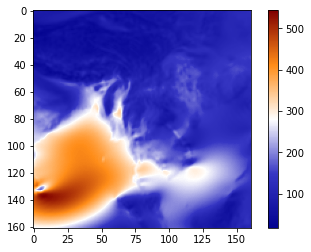

In [20]:
im = plt.imshow(am, cmap=cm.get_cmap(newcmp,8))
plt.colorbar(im)
plt.show()

## plot Q ano2019

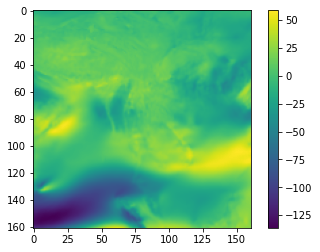

In [21]:
ano19 = a-am
im = plt.imshow(ano19, )
plt.colorbar(im)
plt.show()

### this seems wrong

In [22]:
g = 9.8
ano = np.full((161,161),0)
pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    
    
    q = q19[i]
    v = v19[i]
    u = u19[i]
    
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    V = np.sqrt((q*v-q_*v_)**2+(q*u-q_*u_)**2)
    

    Q = V*(pa[i+1]-pa[i])*100/g
    ano = ano+Q
print(ano)

[[ 15.93162322  15.35701904  15.07852355 ...  26.30596673  26.84089512
   27.90130651]
 [ 15.34559658  14.2537519   13.55930719 ...  28.58525008  29.14991963
   29.51904517]
 [ 13.24942672  12.00071466  11.09348911 ...  30.459822    30.77365839
   30.76236486]
 ...
 [203.0429554  205.31852674 207.35422498 ...  29.53203693  27.29759102
   22.82190526]
 [206.16043037 208.08675784 209.70046073 ...  28.17682229  27.66996081
   24.43926056]
 [208.27099669 209.93479711 211.27346349 ...  25.73467804  25.48775987
   24.4513607 ]]


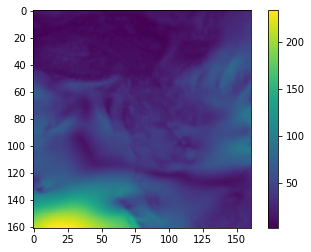

In [23]:
im = plt.imshow(ano, )
plt.colorbar(im)
plt.show()

In [24]:
#  1. 原数据是按小时算的，而我们是按年平均算的。
#  2. 大气压的误差，原数据取了所有大气压，我们取的不是所有的。

## calculate dynamic component 

In [25]:
g = 9.8
dyna = np.full((161,161),0)
pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    
    
    q = q19[i]
    v = v19[i]
    u = u19[i]
    
    qc = qm[i]
    vc = vm[i]
    uc = um[i]

    qa = q - qc
    
    V  = np.sqrt((v/dx1)**2+(u/dy2)**2)
    Vc = np.sqrt((vc/dx1)**2+(uc/dy2)**2)
    Vaa = np.sqrt(((v-vc)/dx1)**2+((u-uc)/dy2)**2)
    D = (q*(V-Vc))*(pa[i+1]-pa[i])*100/g
    #D = (q*(v/dx1-vc/dx1))*(pa[i+1]-pa[i])*100*86400/g+(q*(u/dy1-uc/dy1))*(pa[i+1]-pa[i])*100*86400/g
    dyna = dyna+D
print(dyna)

[[-0.0006133673452615501 -0.000595831752749787 -0.0005734828978947024 ...  -2.3152402131693512e-05 -3.737682185530013e-05 -3.9774409708924355e-05] [-0.0005854350472858414 -0.0005559676799553786 -0.0005326766712220122  ... -1.140057096004705e-05 -8.476981418910486e-06  -5.668408861690327e-06] [-0.00047370647446699825 -0.0004580800924116552 -0.0004452057434812374  ... 1.6421159771570185e-07 3.863018435298183e-07 -8.721937788037275e-07] ... [-0.004733732042595915 -0.004734349182035545 -0.004726909629872531 ...  0.0011460740432914795 0.0010534701103020168 0.0009016369567226357] [-0.004497808734407711 -0.0044869629937416364 -0.004470031956110447 ...  0.0010949914355901256 0.0010594230243498705 0.0009629148642912285] [-0.004193992787259506 -0.004176091685810285 -0.004165678484373597 ...  0.0009861254824746306 0.0009737970290628069 0.0009615652889468071]] / meter


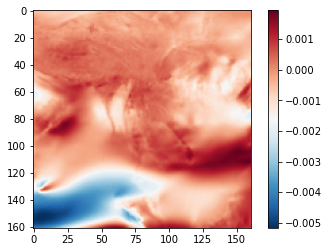

In [26]:
im = plt.imshow(dyna, cmap='RdBu_r')
plt.colorbar(im)
plt.show()

In [27]:
ds_19dyna = xr.Dataset({'dyna': (['lat', 'lon'], dyna)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})

## plot dynamic component

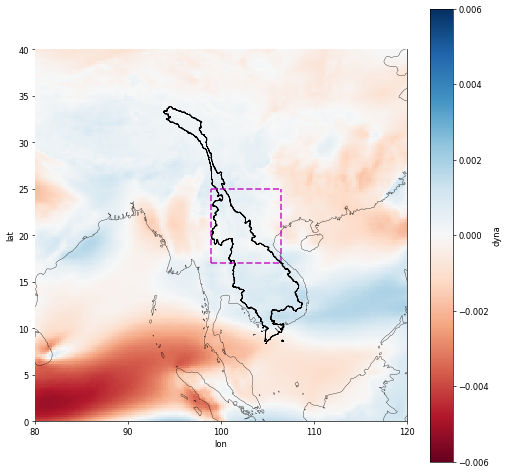

In [28]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=60)
# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [80, 120, 0, 38.26]
ax.set_extent(extent)


# feature and mask
#ax.add_feature(cfeature.OCEAN, facecolor='w',alpha=1,zorder=3)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1,zorder=5)

ds_19dyna.dyna.plot(transform=ccrs.PlateCarree(),zorder=4,cmap='RdBu',vmax=0.006,vmin=-0.006)

ax = stack_shp(ax,  shp, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=6)


ax.plot([99,99], [17,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=7)
ax.plot([106.5,106.5], [17,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=6)
ax.plot([99,106.5], [17,17], '--', color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=8)
ax.plot([99,106.5], [25,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=9)



#plt.savefig('ther2019.pdf')
plt.show() 




## calculate ther component

In [29]:
g = 9.8
ther = np.full((161,161),0)
pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    
    
    q = q19[i]
    v = v19[i]
    u = u19[i]
    
    qc = qm[i]
    vc = vm[i]
    uc = um[i]

    qa = q - qc
    va = v - vc
    ua = u - uc
    
    V  = np.sqrt(v**2+u**2)
    Va = np.sqrt(va**2+ua**2)
    Vc = np.sqrt((vc/dx1)**2+(uc/dy2)**2)
    
    T = ((q-qc)*Vc)*(pa[i+1]-pa[i])*100/g

    ther = ther+T
print(ther)

[[7.008196142713991e-05 6.663385651974971e-05 6.707747892908082e-05 ...  -0.00014188141996751918 -0.00013949201794481703 -0.0001378883168463939] [5.917284126760546e-05 6.211657962528353e-05 6.81430581993775e-05 ...  -0.00016193804864487348 -0.00016088819929899664 -0.00016138363822512292] [5.418682945330354e-05 5.618023450557659e-05 6.0752764375733204e-05 ...  -0.00018651874685172065 -0.00018328053539317784 -0.00018434345920008007] ... [0.0001638583007718689 0.00015277306634115437 0.0001398003805461173 ...  -0.00014760806510249016 -0.000135796757746686 -0.00011812000375462386] [0.00012138924935406871 0.00011231168935229155 0.00010135798987680775  ... -0.000142235449189163 -0.00013166898254171163  -0.00011604883768288824] [7.633784634202966e-05 6.765948585716208e-05 6.230668273421512e-05 ...  -0.00013409528083750788 -0.00012906734044935674 -0.00012298645499068324]] / meter


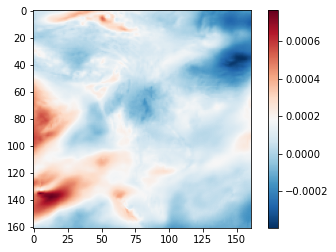

In [30]:
im = plt.imshow(ther, cmap='RdBu_r')
plt.colorbar(im)
plt.show()

In [31]:
ds_19ther = xr.Dataset({'ther': (['lat', 'lon'], ther)},
                    coords={'lon': (['lon'], ds_m.longitude),
                            'lat': (['lat'], ds_m.latitude)})

## plot ther component

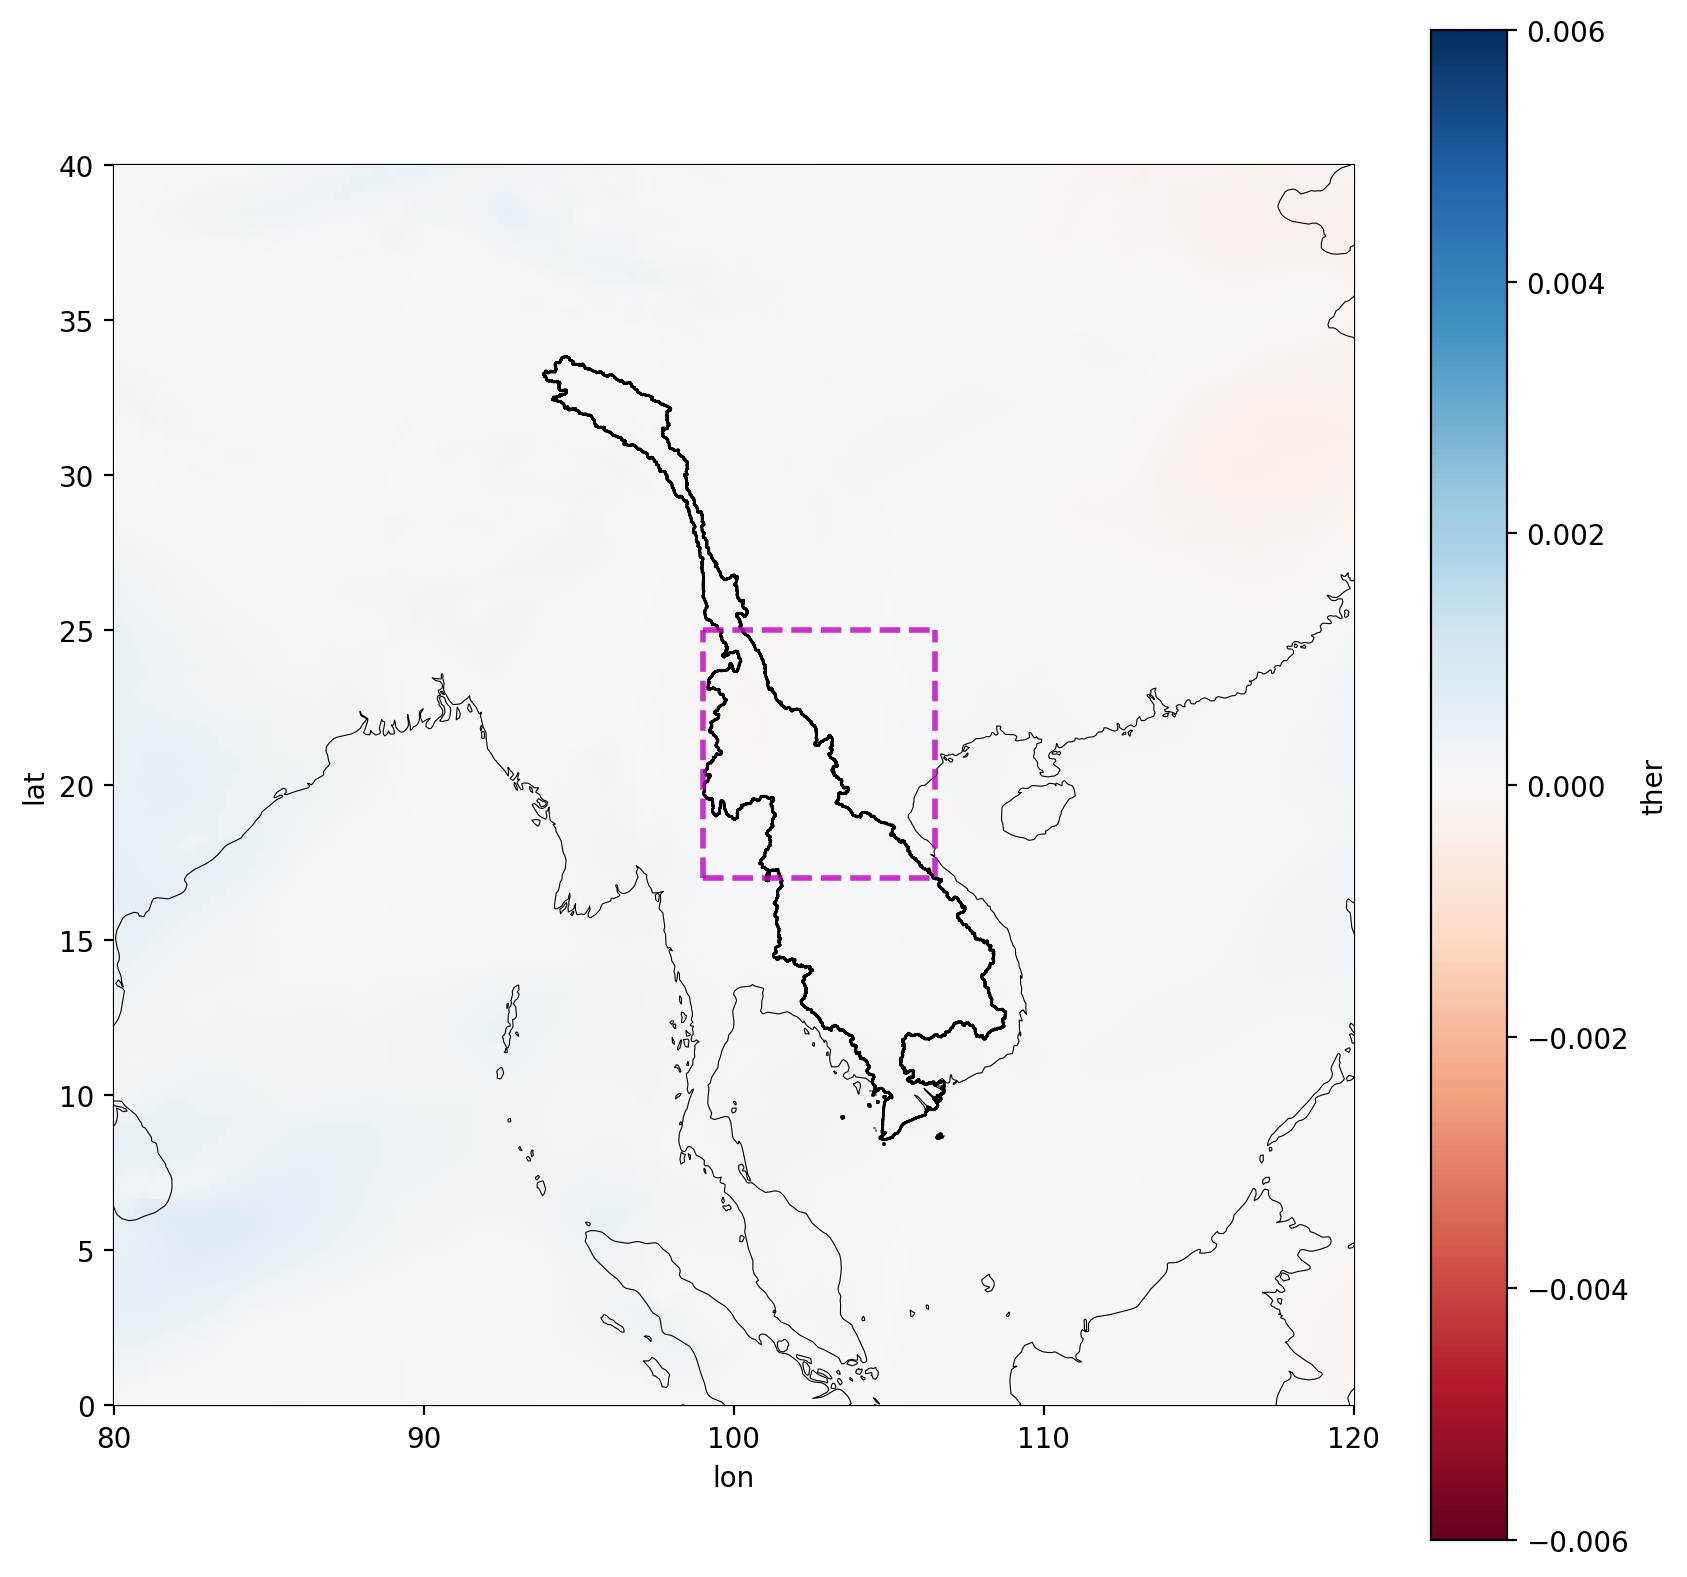

In [32]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=200)
# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [80, 120, 0, 38.26]
ax.set_extent(extent)


# feature and mask
#ax.add_feature(cfeature.OCEAN, facecolor='w',alpha=1,zorder=3)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1,zorder=5)

ds_19ther.ther.plot(transform=ccrs.PlateCarree(),zorder=4,cmap='RdBu',vmax=0.006,vmin=-0.006)

ax = stack_shp(ax,  shp, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=6)


ax.plot([99,99], [17,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=7)
ax.plot([106.5,106.5], [17,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=6)
ax.plot([99,106.5], [17,17], '--', color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=8)
ax.plot([99,106.5], [25,25], '--',color='m',alpha=0.8,lw=2, transform=ccrs.PlateCarree(),zorder=9)



#plt.savefig('ther2019.pdf')
plt.show() 

# qualify dyna and ther 

0.37072635359031436

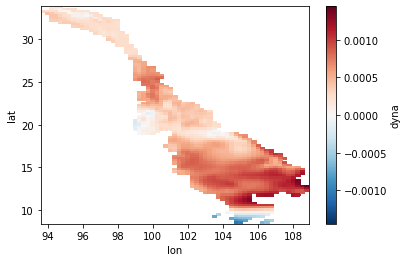

In [33]:
ds_19dyna
#slice shpfile and save as ds_bw_mk

ds_bw_mk_d,_ = ncslice(ds_19dyna,shp,18,index='LEGEND')
ds_bw_mk_d.dyna.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

ddd = ds_bw_mk_d.sel(lat=ds_bw_mk_d.lat[35:68])    # select study region
dyna_mid = np.nanmean(ddd.dyna.values)
dyna_mid*1000

-0.019057056338720173

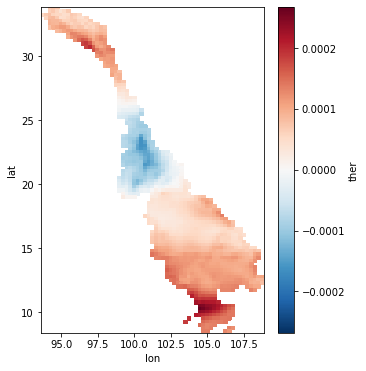

In [34]:
ds_19ther
#slice shpfile and save as ds_bw_mk

ds_bw_mk_t,_ = ncslice(ds_19ther,shp,18,index='LEGEND')
ds_bw_mk_t.ther.plot(cmap='RdBu_r')
plt.rcParams["figure.figsize"] = (5,6)

ttt = ds_bw_mk_t.sel(lat=ds_bw_mk_t.lat[35:68])    # select study region
ther_mid = np.nanmean(ttt.ther.values)
ther_mid*1000

## calculate how many times dyna/ther

In [35]:
dyna_mid/ther_mid

-19.453495177902774

# height and flux

In [36]:
dfwm= pd.read_csv('../../watervapor_flux_divergence/wmiddle.csv')
dfem = pd.read_csv('../../watervapor_flux_divergence/emiddle.csv')
dfnm = pd.read_csv('../../watervapor_flux_divergence/nmiddle.csv')
dfsm = pd.read_csv('../../watervapor_flux_divergence/smiddle.csv')

### mean in and out

In [37]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    westf = xr.DataArray(0)
    southf = xr.DataArray(0)
    for i in range(0,35):
        westf = dsh['p71.162'].sel(lat=dfwm['lat'][i],
                                       lon=dfwm['lon'][i])+westf
    for j in range(0,38):
        southf = dsh['p72.162'].sel(lat=dfsm['lat'][j],
                                       lon=dfsm['lon'][j])+southf
    fttin = np.sqrt((westf.values*28000/10**6)**2+(southf.values*28000/10**6)**2)
    print(fttin)

0.9281289391248504
0.8882666824532404
7.146278114985139
16.67708947848037
29.92094781324211
44.45482946726798
20.70201429377156
9.314430085732491


In [38]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    eastf = xr.DataArray(0)
    northf = xr.DataArray(0)
    for i in range(0,35):
        eastf = dsh['p71.162'].sel(lat=dfem['lat'][i],
                                     lon=dfem['lon'][i])+eastf
    for j in range(0,38):
        northf = dsh['p72.162'].sel(lat=dfnm['lat'][j],
                                   lon=dfnm['lon'][j])+northf
    fttout = np.sqrt((eastf.values*28000/10**6)**2+(northf.values*28000/10**6)**2)
    print(fttout)

0.6961708752295755
1.1093633768929325
6.687556422155183
15.295346064100983
25.503651077774926
40.383496274409836
12.399526480291373
6.59094421669462


## 2019 in and out

In [39]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q19[i]
    v_ = v19[i]
    u_ = u19[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    westf = xr.DataArray(0)
    southf = xr.DataArray(0)
    for i in range(0,35):
        westf = dsh['p71.162'].sel(lat=dfwm['lat'][i],
                                       lon=dfwm['lon'][i])+westf
    for j in range(0,38):
        southf = dsh['p72.162'].sel(lat=dfsm['lat'][j],
                                       lon=dfsm['lon'][j])+southf
    fttin = np.sqrt((westf.values*28000/10**6)**2+(southf.values*28000/10**6)**2)
    print(fttin)

1.14263265883299
0.7788328855086704
6.031200419209832
15.596329440854968
30.662541473283124
49.17268853964326
22.51129248884449
10.981787495949256


In [40]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q19[i]
    v_ = v19[i]
    u_ = u19[i]

    
    
    

    Qe = q_*u_*(pa[i+1]-pa[i])*100/9.8
    Qn = q_*v_*(pa[i+1]-pa[i])*100/9.8
    ame = ame+Qe
    amn = amn+Qn
    dsh = xr.Dataset({'p71.162': (['lat', 'lon'], ame),'p72.162': (['lat', 'lon'], amn)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    eastf = xr.DataArray(0)
    northf = xr.DataArray(0)
    for i in range(0,35):
        eastf = dsh['p71.162'].sel(lat=dfem['lat'][i],
                                     lon=dfem['lon'][i])+eastf
    for j in range(0,38):
        northf = dsh['p72.162'].sel(lat=dfnm['lat'][j],
                                   lon=dfnm['lon'][j])+northf
    fttout = np.sqrt((eastf.values*28000/10**6)**2+(northf.values*28000/10**6)**2)
    print(fttout)

1.0212205657519535
0.9779507272908786
5.731365211376238
14.84429977385266
26.784160375435945
47.25593325690788
15.257307837508083
8.159650778223096


## wind U V and sh

In [41]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = q[i]
    v_ = vm[i]
    u_ = um[i]
    
    
    a = v_
    dsh = xr.Dataset({'a': (['lat', 'lon'], a)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})

    awind = xr.DataArray(0)
    for i in range(0,38):
        awind = dsh['a'].sel(lat=dfnm['lat'][i],lon=dfnm['lon'][i])+awind

    print(awind.values/35)

-1.000507390499115
0.1610065140894481
0.5908381402492523
0.5684365124042545
0.7847430874194418
1.290928823181561
0.7805991215365273
0.4797478258609772


In [42]:
g = 9.8

pa = [200,300,400,500,600,700,850,925,1000]
for i in range(0,8):
    ame = np.full((161,161),0)
    amn = np.full((161,161),0)
    q_ = qm[i]
    v_ = vm[i]
    u_ = um[i]
    
    
    a = q_
    dsh = xr.Dataset({'a': (['lat', 'lon'], a)},
                    coords={'lon': (['lon'], ds.longitude),
                            'lat': (['lat'], ds.latitude)})
    qe = xr.DataArray(0)
    qn = xr.DataArray(0)
    for i in range(0,35):
        qe = dsh['a'].sel(lat=dfwm['lat'][i],
                                     lon=dfwm['lon'][i])+qe
    for j in range(0,38):
        qn = dsh['a'].sel(lat=dfsm['lat'][j],
                                   lon=dfsm['lon'][j])+qn
    qt = (qe+qn)/73


    print(qt.values)

0.0005837494961132793
0.0017600576377358951
0.0038479791909507284
0.006173005684801977
0.009001218650030764
0.013726098628791228
0.015474382711395826
0.016119282590608075
